In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
import seaborn as sns
import datetime
%matplotlib inline

Границы Нью-Йорка.

In [2]:
nyc_longitude_west = -74.25559
nyc_longitude_east = -73.70001
nyc_latitude_north = 40.91553
nyc_latitude_south = 40.49612

Загружаем необходимые данные.

In [4]:
data = pd.read_csv("data/yellow_tripdata_2016-05.csv", 
                   parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], 
                   usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                            'passenger_count', 'trip_distance', 
                            'pickup_longitude', 'pickup_latitude'])
data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040
1,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751
2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573
3,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601
4,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192
5,2016-05-01,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764
6,2016-05-01,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739
7,2016-05-01,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507
8,2016-05-01,2016-05-01 00:00:00,4,1.59,-74.001610,40.740990
9,2016-05-01,2016-05-01 00:00:00,3,3.52,-74.013855,40.714119


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 6 columns):
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 541.8 MB


Удаляем маршруты с нулевой длительностью, нулевым количеством пассажиров, нулевым расстоянием по счетчику и те маршруты, которые начинаются не внутри Нью Йорка.

In [6]:
%%time
drop_indexes = data[(data['tpep_dropoff_datetime'] == data['tpep_pickup_datetime']) | 
                    (data['passenger_count'] == 0) | 
                    (data['trip_distance'] == 0) | 
                    (nyc_longitude_west > data['pickup_longitude']) | (data['pickup_longitude'] > nyc_longitude_east) | 
                    (nyc_latitude_south > data['pickup_latitude']) | (data['pickup_latitude'] > nyc_latitude_north)].index

data.drop(drop_indexes, inplace=True)
print(len(data))

11626521
Wall time: 3.85 s


In [7]:
data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude
0,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040
1,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751
2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573
3,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601
4,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192
5,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764
6,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739
7,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507
11,2016-05-01 00:00:01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345
12,2016-05-01 00:00:01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082


Удаляем ненужные далее столбцы.

In [8]:
data.drop(['tpep_dropoff_datetime', 'passenger_count', 'trip_distance'], axis = 1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 3 columns):
tpep_pickup_datetime    datetime64[ns]
pickup_longitude        float64
pickup_latitude         float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 354.8 MB


Оставляем от времени поездки только часы.

In [10]:
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].apply(lambda dt: dt.replace(minute=0, second=0, microsecond=0))
data.head(10)

,tpep_pickup_datetime,pickup_longitude,pickup_latitude
0,2016-05-01,-73.985901,40.768040
1,2016-05-01,-73.991577,40.744751
2,2016-05-01,-73.993073,40.741573
3,2016-05-01,-73.991943,40.684601
4,2016-05-01,-74.005280,40.740192
5,2016-05-01,-73.979294,40.755764
6,2016-05-01,-73.981544,40.780739
7,2016-05-01,-73.987198,40.750507
11,2016-05-01,-73.951302,40.774345
12,2016-05-01,-73.983498,40.726082


Выводим регионы, вводим функции для нахождения региона по долготе и широте. Первая функция использовалась для проверки последующих.

In [11]:
regions = pd.read_csv("data/regions.csv", delimiter=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [12]:
def check_longit_latit(regions, data):
    print data
    return ((regions.west <= data.pickup_longitude) & 
            (regions.east > data.pickup_longitude) &
            (regions.south <= data.pickup_latitude) &
            (regions.north > data.pickup_latitude))
regions[check_longit_latit(regions, data.ix[0])].region.values[0]

tpep_pickup_datetime    2016-05-01 00:00:00
pickup_longitude                   -73.9859
pickup_latitude                      40.768
Name: 0, dtype: object


C:\Python27\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


1233

In [13]:
def long_reg(val):
    return np.ceil((val - nyc_longitude_west)*50.0/(nyc_longitude_east - nyc_longitude_west))
def lat_reg(val):
    return np.ceil((val - nyc_latitude_south)*50.0/(nyc_latitude_north - nyc_latitude_south))
def find_reg(longitude, latitude):
    return (long_reg(longitude) - 1)*50.0 + lat_reg(latitude)
find_reg(data.ix[0].pickup_longitude, data.ix[0].pickup_latitude)

C:\Python27\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


1233.0

Далее применияем функции long_reg, lat_reg для нахождения региона по долготе и широте.

In [15]:
data.pickup_longitude = data.pickup_longitude.apply(long_reg)
data.pickup_latitude = data.pickup_latitude.apply(lat_reg)
data.head()

,tpep_pickup_datetime,pickup_longitude,pickup_latitude
0,2016-05-01,8933.0,-893.0
1,2016-05-01,8843.0,-1251.0
2,2016-05-01,8843.0,-1251.0
3,2016-05-01,8843.0,-2085.0
4,2016-05-01,8753.0,-1251.0


Находим регион.

In [16]:
data['region'] = (data.pickup_longitude - 1)*50.0 + data.pickup_latitude
data.head()

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,region
0,2016-05-01,8933.0,-893.0,445707.0
1,2016-05-01,8843.0,-1251.0,440849.0
2,2016-05-01,8843.0,-1251.0,440849.0
3,2016-05-01,8843.0,-2085.0,440015.0
4,2016-05-01,8753.0,-1251.0,436349.0


Аггрегируем данные по часам и регионам.

In [17]:
data['timestamp'] = data.tpep_pickup_datetime.apply(lambda x: x.value)
data.head()

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,region,timestamp
0,2016-05-01,8933.0,-893.0,445707.0,1462060800000000000
1,2016-05-01,8843.0,-1251.0,440849.0,1462060800000000000
2,2016-05-01,8843.0,-1251.0,440849.0,1462060800000000000
3,2016-05-01,8843.0,-2085.0,440015.0,1462060800000000000
4,2016-05-01,8753.0,-1251.0,436349.0,1462060800000000000


In [19]:
times = np.sort(data.timestamp.unique())
times = np.hstack((times, times[-1]+14620608000))

In [20]:
times = np.hstack((times[0]-3600000000000,times))

In [21]:
times.shape

(746L,)

In [22]:
agg_data = sts.binned_statistic_2d(data.region, data.timestamp, None, 'count', 
                                   bins=[np.arange(1, 2502), times])

In [23]:
np.unique(agg_data.statistic.ravel(), return_counts=True)

(array([0.]), array([1862500], dtype=int64))

Выведем первые строчки полученной таблицы.

В моем случае строки - это регионы. А в первых регионах не было поездок.

In [24]:
np.unique(agg_data.statistic[:10,:])

array([0.])

Выведем данные по всем регионам за первый день мая 2016 года.

Выведем некоторые другие строчки таблицы.

Видим, что есть регионы в которых преобладают поездки в данный день, а есть регионы, из которых вообще не было поездок

Посмотрим на все строчки.

C:\Python27\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


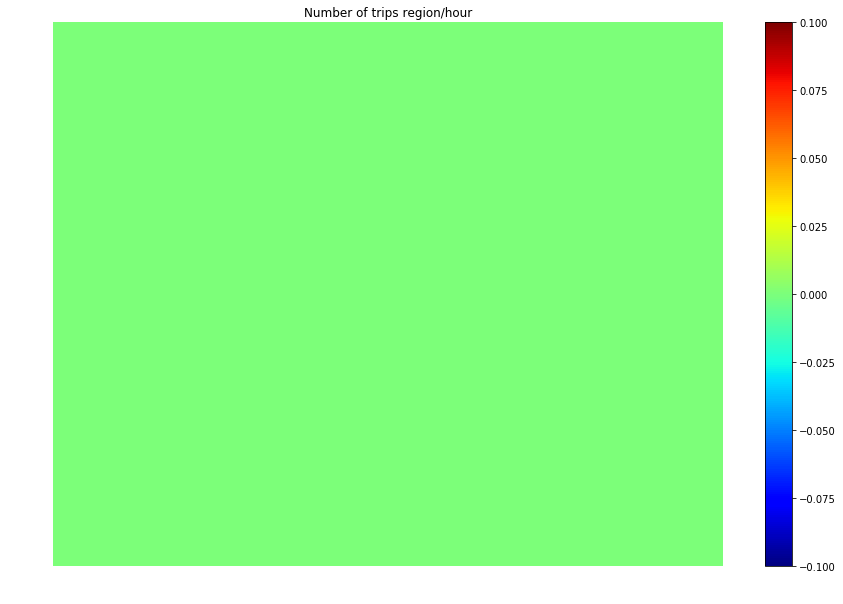

In [25]:
plt.figure(figsize=(15,10))
img = plt.imshow(agg_data.statistic, interpolation='nearest')
img.set_cmap('jet')
plt.title("Number of trips region/hour")
plt.axis('off')
plt.ylabel("Region")
plt.xlabel("Hour")
plt.axes().set_aspect('auto')
plt.colorbar()

Выделяются 10 регионов, из которых совершалось существенное число поездок. В тоже время имеется большое количество регионов откуда не совершалось поездок.

Данные о расположении Эмпаир Стэйт Билдинг были взяты отсюда: http://www.latlong.net/place/empire-state-building-new-york-ny-usa-5312.html Находим регион, к которому он относится.

In [26]:
empire_latitude = 40.748817
empire_longitude = -73.985428
empire_region = int(find_reg(empire_longitude, empire_latitude))
empire_region

1231

Выводим график поездок.

In [27]:
agg_data.statistic.shape

(2500L, 745L)

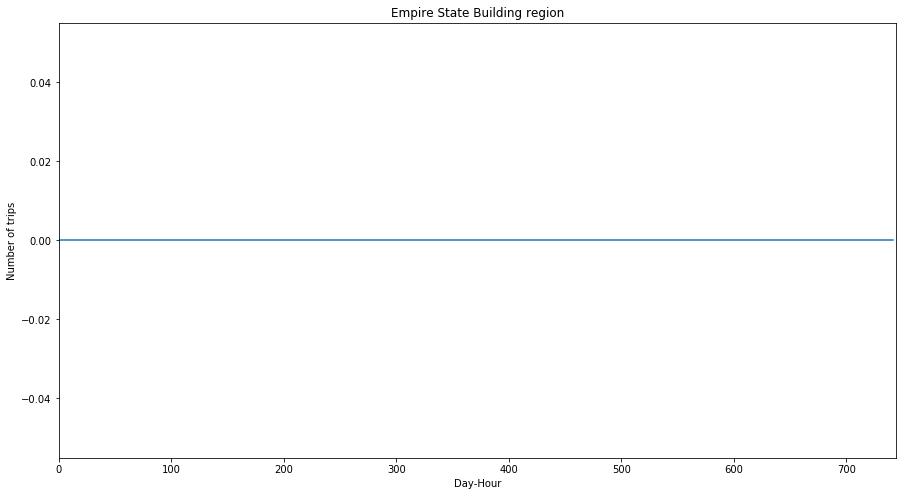

In [28]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(743), agg_data.statistic[empire_region-1,:743])
plt.xlim([0,744])
plt.ylabel("Number of trips")
plt.xlabel("Day-Hour")
plt.title("Empire State Building region");

Число ячеек, из которых не было совершено ни одной поездки.

In [29]:
np.unique(agg_data.statistic.ravel(), return_counts=True)[1][0]

1862500

Таким образом, получили, что из 1718238 ячейки (день-час, регион) не было поездок в мае 2016.

Сохраняем полученные данные в файл

In [2]:
import pickle

In [30]:
with open('./data/2014/p_c_03.pkl', 'wb') as fid:
    pickle.dump(agg_data1.statistic, fid)

In [65]:
with open('./data/2014/03.pkl', 'wb') as fid:
    pickle.dump(agg_data.statistic, fid)

In [5]:
with open('./data/2016/p_c_06.pkl', 'rb') as fid:
    sts = pickle.load(fid)

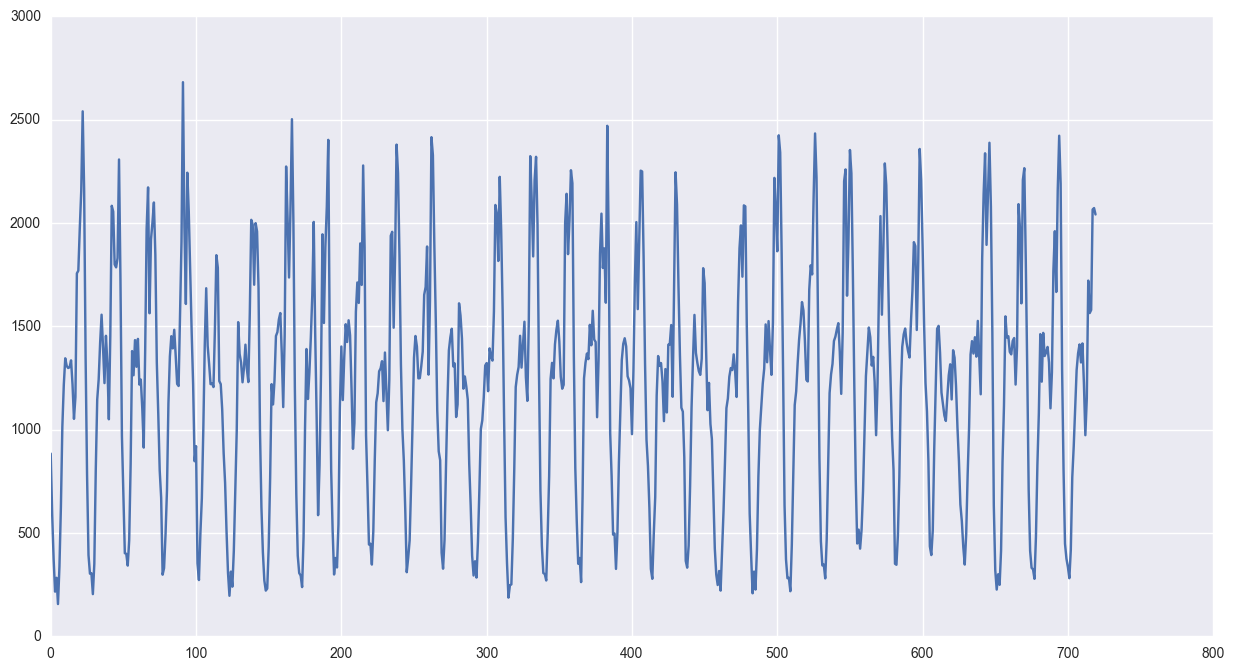

In [10]:
plt.figure(figsize=(15,8))
plt.plot(sts[1231,:743])